# 10 minutes to Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook was borrowed from [Koalas documentation page](https://koalas.readthedocs.io/en/latest/) and shows you some key differences between pandas and Koalas. You can run this examples by yourself on a live notebook [here](https://mybinder.org/v2/gh/databricks/koalas/master?filepath=docs%2Fsource%2Fgetting_started%2F10min.ipynb) or in a Spark cluster.

In [1]:
import pandas as pd
import numpy as np
import sys
import databricks.koalas as ks
from pyspark.sql import SparkSession

print("Python version:", sys.version)
print("Spark version:", SparkSession.builder.getOrCreate().version)
print("Koalas version:", ks.__version__)

Python version: 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:21:18) 
[GCC 9.3.0]
Spark version: 3.1.1
Koalas version: 1.4.0


## Object Creation



Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [2]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,-0.780151,-1.221014,0.629660,-0.593064
2013-01-02,-0.893106,1.163479,-0.439279,0.443316
2013-01-03,2.158920,0.639934,-1.479394,0.745854
2013-01-04,1.321525,0.505173,3.306253,1.177101
2013-01-05,0.277503,0.844582,-1.114082,-1.482386
2013-01-06,0.594833,-2.395429,-0.766698,-0.168764


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [10]:
kdf = ks.from_pandas(pdf)

In [11]:
type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [12]:
kdf

,A,B,C,D
2013-01-01,-0.780151,-1.221014,0.629660,-0.593064
2013-01-02,-0.893106,1.163479,-0.439279,0.443316
2013-01-03,2.158920,0.639934,-1.479394,0.745854
2013-01-04,1.321525,0.505173,3.306253,1.177101
2013-01-05,0.277503,0.844582,-1.114082,-1.482386
2013-01-06,0.594833,-2.395429,-0.766698,-0.168764


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

In [13]:
spark = SparkSession.builder.getOrCreate()

In [14]:
sdf = spark.createDataFrame(pdf)

In [15]:
sdf.show()

+-------------------+-------------------+-------------------+-------------------+
|                  A|                  B|                  C|                  D|
+-------------------+-------------------+-------------------+-------------------+
|-0.7801506382145543|-1.2210143392953485| 0.6296604105046855| -0.593064167028557|
| -0.893106169411426| 1.1634785607776819|-0.4392793866780149|0.44331586120044736|
| 2.1589200697109927| 0.6399336595167353|-1.4793936040799023| 0.7458535794680261|
| 1.3215253296798428| 0.5051731276976056|  3.306253192357359|  1.177100922892378|
| 0.2775028394128762|  0.844582098363745|-1.1140816578941448|-1.4823862502151421|
| 0.5948328419188119|  -2.39542935383466|-0.7666977379540721| -0.168764434109608|
+-------------------+-------------------+-------------------+-------------------+



Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [16]:
kdf = sdf.to_koalas()

In [17]:
kdf

,A,B,C,D
0,-0.780151,-1.221014,0.629660,-0.593064
1,-0.893106,1.163479,-0.439279,0.443316
2,2.158920,0.639934,-1.479394,0.745854
3,1.321525,0.505173,3.306253,1.177101
4,0.277503,0.844582,-1.114082,-1.482386
5,0.594833,-2.395429,-0.766698,-0.168764


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [18]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [19]:
kdf.head()

,A,B,C,D
0,-0.780151,-1.221014,0.629660,-0.593064
1,-0.893106,1.163479,-0.439279,0.443316
2,2.158920,0.639934,-1.479394,0.745854
3,1.321525,0.505173,3.306253,1.177101
4,0.277503,0.844582,-1.114082,-1.482386


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [20]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [21]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
kdf.to_numpy()

array([[-0.78015064, -1.22101434,  0.62966041, -0.59306417],
       [-0.89310617,  1.16347856, -0.43927939,  0.44331586],
       [ 2.15892007,  0.63993366, -1.4793936 ,  0.74585358],
       [ 1.32152533,  0.50517313,  3.30625319,  1.17710092],
       [ 0.27750284,  0.8445821 , -1.11408166, -1.48238625],
       [ 0.59483284, -2.39542935, -0.76669774, -0.16876443]])

Describe shows a quick statistic summary of your data

In [23]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.446587,-0.077213,0.022744,0.020343
std,1.187252,1.408893,1.762683,0.970936
min,-0.893106,-2.395429,-1.479394,-1.482386
25%,-0.780151,-1.221014,-1.114082,-0.593064
50%,0.277503,0.505173,-0.766698,-0.168764
75%,1.321525,0.844582,0.629660,0.745854
max,2.158920,1.163479,3.306253,1.177101


Transposing your data

In [24]:
kdf.T

,0,1,2,3,4,5
A,-0.780151,-0.893106,2.158920,1.321525,0.277503,0.594833
B,-1.221014,1.163479,0.639934,0.505173,0.844582,-2.395429
C,0.629660,-0.439279,-1.479394,3.306253,-1.114082,-0.766698
D,-0.593064,0.443316,0.745854,1.177101,-1.482386,-0.168764


Sorting by its index

In [25]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,0.594833,-2.395429,-0.766698,-0.168764
4,0.277503,0.844582,-1.114082,-1.482386
3,1.321525,0.505173,3.306253,1.177101
2,2.158920,0.639934,-1.479394,0.745854
1,-0.893106,1.163479,-0.439279,0.443316
0,-0.780151,-1.221014,0.629660,-0.593064


Sorting by value

In [26]:
kdf.sort_values(by='B')

,A,B,C,D
5,0.594833,-2.395429,-0.766698,-0.168764
0,-0.780151,-1.221014,0.629660,-0.593064
3,1.321525,0.505173,3.306253,1.177101
2,2.158920,0.639934,-1.479394,0.745854
4,0.277503,0.844582,-1.114082,-1.482386
1,-0.893106,1.163479,-0.439279,0.443316


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [27]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [28]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [29]:
kdf1 = ks.from_pandas(pdf1)

In [30]:
kdf1

,A,B,C,D,E
2013-01-01,-0.780151,-1.221014,0.629660,-0.593064,1.0
2013-01-02,-0.893106,1.163479,-0.439279,0.443316,1.0
2013-01-03,2.158920,0.639934,-1.479394,0.745854,NaN
2013-01-04,1.321525,0.505173,3.306253,1.177101,NaN


To drop any rows that have missing data.

In [31]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.780151,-1.221014,0.629660,-0.593064,1.0
2013-01-02,-0.893106,1.163479,-0.439279,0.443316,1.0


Filling missing data.

In [32]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.780151,-1.221014,0.629660,-0.593064,1.0
2013-01-02,-0.893106,1.163479,-0.439279,0.443316,1.0
2013-01-03,2.158920,0.639934,-1.479394,0.745854,5.0
2013-01-04,1.321525,0.505173,3.306253,1.177101,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [33]:
kdf.mean()

A    0.446587
B   -0.077213
C    0.022744
D    0.020343
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [34]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [35]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

226 ms ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

986 ms ± 80.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [38]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [39]:
kdf

,A,B,C,D
0,foo,one,0.164790,0.659348
1,bar,one,1.861524,0.223740
2,foo,two,0.523715,1.337940
3,bar,three,-0.734856,-0.681766
4,foo,two,-0.677861,-0.590886
5,bar,two,-0.970970,-1.532574
6,foo,one,0.857741,-0.020135
7,foo,three,0.895727,1.889636


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [40]:
kdf.groupby('A').sum()

,C,D
A,,
bar,0.155699,-1.990600
foo,1.764113,3.275903


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [41]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    1.022532  0.639214
    two   -0.154146  0.747054
bar three -0.734856 -0.681766
foo three  0.895727  1.889636
bar one    1.861524  0.223740
    two   -0.970970 -1.532574

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt

In [43]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [44]:
kser = ks.Series(pser)

In [45]:
kser = kser.cummax()

<AxesSubplot:>

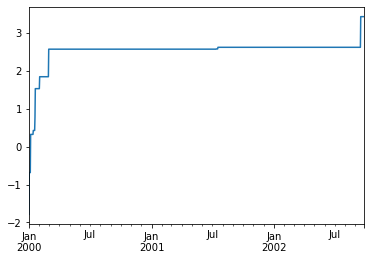

In [46]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [47]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [48]:
kdf = ks.from_pandas(pdf)

In [49]:
kdf = kdf.cummax()

<AxesSubplot:>

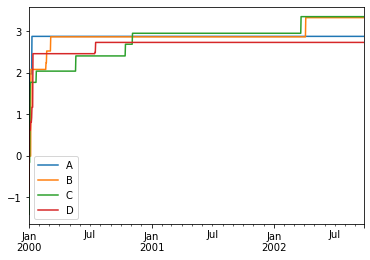

In [50]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [51]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.477560,-0.470080,-1.411673,-0.908481
1,1.968478,-0.011743,-0.173453,0.611725
2,1.968478,-0.011743,-0.159920,0.611725
3,1.968478,-0.011743,1.238878,0.611725
4,1.968478,-0.011743,1.765315,0.611725
5,1.968478,-0.011743,1.765315,0.805752
6,1.968478,2.076497,1.765315,0.805752
7,1.968478,2.076497,1.765315,0.805752
8,1.968478,2.076497,1.765315,0.910207
9,2.872828,2.076497,1.765315,1.165452


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [52]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.477560,-0.470080,-1.411673,-0.908481
1,1.968478,-0.011743,-0.173453,0.611725
2,1.968478,-0.011743,-0.159920,0.611725
3,1.968478,-0.011743,1.238878,0.611725
4,1.968478,-0.011743,1.765315,0.611725
5,1.968478,-0.011743,1.765315,0.805752
6,1.968478,2.076497,1.765315,0.805752
7,1.968478,2.076497,1.765315,0.805752
8,1.968478,2.076497,1.765315,0.910207
9,2.872828,2.076497,1.765315,1.165452


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [53]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.477560,-0.470080,-1.411673,-0.908481
1,1.968478,-0.011743,-0.173453,0.611725
2,1.968478,-0.011743,-0.159920,0.611725
3,1.968478,-0.011743,1.238878,0.611725
4,1.968478,-0.011743,1.765315,0.611725
5,1.968478,-0.011743,1.765315,0.805752
6,1.968478,2.076497,1.765315,0.805752
7,1.968478,2.076497,1.765315,0.805752
8,1.968478,2.076497,1.765315,0.910207
9,2.872828,2.076497,1.765315,1.165452
